In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/MachineLearningProject/dataset.csv")

In [19]:
data=data[:3437]
print(data)

      label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0         1       0       0       0       0       0       0       0       0   
1         0       0       0       0       0       0       0       0       0   
2         1       0       0       0       0       0       0       0       0   
3         4       0       0       0       0       0       0       0       0   
4         0       0       0       0       0       0       0       0       0   
...     ...     ...     ...     ...     ...     ...     ...     ...     ...   
3432      5       0       0       0       0       0       0       0       0   
3433      5       0       0       0       0       0       0       0       0   
3434      2       0       0       0       0       0       0       0       0   
3435      0       0       0       0       0       0       0       0       0   
3436      5       0       0       0       0       0       0       0       0   

      pixel8  ...  pixel774  pixel775  pixel776  pi

In [23]:
x = data.iloc[:,1:].values
print(x)
print(x.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(42000, 784)


In [24]:
y = data.iloc[:,:1]["label"]
print(y)
print(y.shape)

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64
(42000,)


In [25]:
x=x/255
print(x)
print(x.shape)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(42000, 784)


In [26]:
from PIL import Image,ImageChops
import numpy as np
def preprocess_img(img_path):
    image = Image.open(img_path,'r')
    image = image.convert('L')
    image = ImageChops.invert(image)
    image = image.resize((28,28))
    px_data = list(image.getdata())
    for i in range(len(px_data)):
        if px_data[i]/255 <= 0.43:
            px_data[i] = 0
    px_data = np.array(px_data)/255
    return px_data

In [27]:
image=input("Enter path of the Image:")
pix_img =preprocess_img(image)

Enter path of the Image:/content/drive/MyDrive/MachineLearningProject/written3.jpg


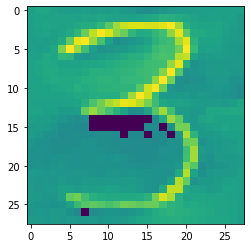

In [28]:
import matplotlib.pyplot as plt
plt.imshow(pix_img.reshape(28,28))

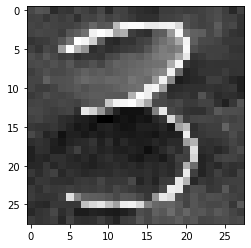

In [29]:
import cv2 
import matplotlib.pyplot as plt

# Load sample image
test_image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

# Preview sample image
plt.imshow(test_image, cmap='gray')

# Format Image
img_resized = cv2.resize(test_image, (28, 28), interpolation=cv2.INTER_LINEAR)
img_resized = cv2.bitwise_not(img_resized)

# Preview reformatted image
plt.imshow(img_resized, cmap='gray')

In [30]:
from sklearn.naive_bayes import GaussianNB

def Naive_Bayes_classifier(image):
    gnb = GaussianNB()
    gnb.fit(x_train,y_train)
    y_pred = gnb.predict(image)
    accuracy = gnb.score(x_test,y_test) 
    print("MutiNomial Naive_Bayes_Classification")
    print("Accuracy :",round(accuracy,2))
    print("label for given image :",y_pred,end="\n")
Naive_Bayes_classifier([pix_img])

MutiNomial Naive_Bayes_Classification
Accuracy : 0.55
label for given image : [2]


In [31]:
from sklearn.tree import DecisionTreeClassifier
def DecisionTree_Classifier(image,type):
    ans = None
    if type=="gini":
        clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)
        clf_gini.fit(x_train, y_train)
        accuracy = clf_gini.score(x_test,y_test)
        ans = clf_gini.predict(image)
    elif type=="entropy":
        clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 3, min_samples_leaf = 5)
        clf_entropy.fit(x_train, y_train)
        accuracy = clf_entropy.score(x_test,y_test)
        ans = clf_entropy.predict(image)
    else:
        print("valid types are: 1)gini 2)entropy")
    print("DecisionTree_Classifier: ")
    print("Accuracy :",round(accuracy,2))
    print("label for given image :",ans,end="\n")

DecisionTree_Classifier([pix_img],"gini")


DecisionTree_Classifier: 
Accuracy : 0.46
label for given image : [3]


In [32]:
from sklearn.ensemble import RandomForestClassifier
def RandomForest_Classifier(image):
    rd = RandomForestClassifier()
    rd.fit(x_train,y_train)
    accuracy = rd.score(x_test,y_test) 
    rd_pred = rd.predict(image)
    print("RandomForest_Classifier: ")
    print("Accuracy :",round(accuracy,2))
    print("label for given image :",rd_pred,end="\n")

RandomForest_Classifier([pix_img])

RandomForest_Classifier: 
Accuracy : 0.96
label for given image : [8]


In [33]:
from sklearn.neighbors import KNeighborsClassifier 
def KNeighbors_Classifier(image):
    classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
    classifier.fit(x_train, y_train)
    accuracy = classifier.score(x_test,y_test)
    ans = classifier.predict(image)
    print("KNeighbors_Classifier: ")
    print("Accuracy :",round(accuracy,2))
    print("label for given image :",ans,end="\n")

KNeighbors_Classifier([pix_img])

KNeighbors_Classifier: 
Accuracy : 0.97
label for given image : [5]


In [ ]:
from sklearn.svm import SVC
def SVC_classifier(image):
    clf = SVC(kernel='linear') 
    clf.fit(x_train, y_train)
    accuracy = clf.score(x_test,y_test)
    ans = clf.predict(image)
    print("SVC_classifier: ")
    print("Accuracy :",round(accuracy,2))
    print("label for given image :",ans,end="\n")

SVC_classifier([pix_img])

SVC_classifier: 
Accuracy : 0.93
label for given image : [2]


In [ ]:
from sklearn.ensemble import BaggingClassifier
def Bagging_classifier(image):
    bagging = BaggingClassifier(base_estimator=KNeighborsClassifier(),max_samples=0.5, max_features=0.5)
    bagging.fit(x_train,y_train)
    accuracy = bagging.score(x_test,y_test)
    ans = bagging.predict(image)
    print("Bagging_classifier: ")
    print("Accuracy :",round(accuracy,2))
    print("label for given image :",ans,end="\n")

Bagging_classifier([pix_img])

Bagging_classifier: 
Accuracy : 0.9
label for given image : [3]


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
def Boosting_classifier(image):
    boosting = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
    boosting.fit(x_train,y_train)
    accuracy = boosting.score(x_test,y_test)
    ans = boosting.predict(image)
    print("Boosting classifier: ")
    print("Accuracy :",round(accuracy,2))
    print("label for given image :",ans,end="\n")

Boosting_classifier([pix_img])

Boosting classifier: 
Accuracy : 0.74
label for given image : [2]


In [ ]:
from sklearn.neural_network import MLPClassifier
def ANN(image):
  clf= MLPClassifier(hidden_layer_sizes=(500,250,125,75,35),activation="relu",solver='sgd',learning_rate_init= 0.01, max_iter=500)
  clf.fit(x_train, y_train)
  accuracy = clf.score(x_test,y_test)
  ans = clf.predict(image)
  print("Artificial Neural Network classifier: ")
  print("Accuracy :",round(accuracy,2))
  print("label for given image :",ans,end="\n")
  shape=[coef.shape for coef in clf.coefs_]
  print(shape)

ANN([pix_img])


Artificial Neural Network classifier: 
Accuracy : 0.92
label for given image : [3]
[(784, 500), (500, 250), (250, 125), (125, 75), (75, 35), (35, 10)]
